<div style="color:white;background-color:Black;padding:3%;border-radius:150px 150px;font-size:2.5em;text-align:center">Pandas toolkit Part 2</div>

Pandas

In [1]:
# Importing pandas and numpy
import pandas as pd 
import numpy as np 

In [2]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    5
1    6
2    3
3    2
4    3
5    0
6    6
7    3
8    3
9    3
dtype: int32

In [31]:
np.random.randint(10,20, size=4)

array([14, 11, 17, 15])

In [45]:
pd.DataFrame(np.random.randn(3, 5), columns=['a','b','c','d','c'], index=['a','b','c'])

,a,b,c,d,c
a,-2.184088,0.141050,-0.081611,0.753791,-2.356003
b,0.808329,0.660476,0.217371,0.418574,-0.534748
c,-0.025201,0.343455,0.874840,-0.153762,1.194295


In [3]:
s.value_counts()

3    5
6    2
5    1
2    1
0    1
Name: count, dtype: int64

In [4]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [5]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.149467,1.024840,0.219897,-0.603492
1,0.553831,1.887607,0.778914,2.097322
2,-0.656831,-0.565996,0.166374,-0.841488
3,-0.349427,0.903168,0.375505,-0.888978
4,0.714865,1.523113,1.011598,0.710005
5,1.918241,1.633361,0.818521,0.012104
6,0.863795,0.180313,0.659189,0.680862
7,-0.830796,-1.110410,-0.144316,0.146805
8,0.732232,1.348640,1.532646,-0.205351
9,0.563221,-0.419478,0.907163,0.897066


In [6]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-0.149467,1.024840,0.219897,-0.603492
1,0.553831,1.887607,0.778914,2.097322
2,-0.656831,-0.565996,0.166374,-0.841488
3,-0.349427,0.903168,0.375505,-0.888978
4,0.714865,1.523113,1.011598,0.710005
5,1.918241,1.633361,0.818521,0.012104
6,0.863795,0.180313,0.659189,0.680862
7,-0.830796,-1.110410,-0.144316,0.146805
8,0.732232,1.348640,1.532646,-0.205351
9,0.563221,-0.419478,0.907163,0.897066


In [7]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [8]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [9]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [10]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [11]:
df = pd.DataFrame({
    
"A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
"B": ["one", "one", "two", "three", "two", "two", "one", "three"],
"C": np.random.randn(8),
"D": np.random.randn(8)
    
     })
df

,A,B,C,D
0,foo,one,-0.459355,-1.142665
1,bar,one,0.515327,-0.844466
2,foo,two,-2.093565,-0.794899
3,bar,three,0.955468,-0.257824
4,foo,two,1.404422,-0.767434
5,bar,two,0.108990,0.692629
6,foo,one,-1.179980,-0.352207
7,foo,three,1.450437,-0.195512


In [12]:
df.groupby("A").sum()

,B,C,D
A,,,
bar,onethreetwo,1.579785,-0.409661
foo,onetwotwoonethree,-0.878042,-3.252717


In [13]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.515327 -0.844466
    three  0.955468 -0.257824
    two    0.108990  0.692629
foo one   -1.639335 -1.494872
    three  1.450437 -0.195512
    two   -0.689144 -1.562332

In [14]:
tuples = list(zip(*[
["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
["one", "two", "one", "two", "one", "two", "one", "two"]
]))

index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.494687  0.546372
      two    -0.400677 -0.703262
baz   one    -0.938448  0.288019
      two    -0.623906  0.514351

In [15]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.494687
               B    0.546372
       two     A   -0.400677
               B   -0.703262
baz    one     A   -0.938448
               B    0.288019
       two     A   -0.623906
               B    0.514351
dtype: float64

In [16]:
stacked.unstack()

A         B
first second                    
bar   one    -0.494687  0.546372
      two    -0.400677 -0.703262
baz   one    -0.938448  0.288019
      two    -0.623906  0.514351

In [17]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.494687 -0.400677
      B  0.546372 -0.703262
baz   A -0.938448 -0.623906
      B  0.288019  0.514351

In [18]:
df = pd.DataFrame({
    
"A": ["one", "one", "two", "three"] * 3,
"B": ["A", "B", "C"] * 4,
"C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
"D": np.random.randn(12),
"E": np.random.randn(12)
    
})
df

,A,B,C,D,E
0,one,A,foo,-0.717774,-0.371388
1,one,B,foo,0.652375,-0.283766
2,two,C,foo,0.088272,0.397879
3,three,A,bar,0.391226,-1.315691
4,one,B,bar,0.335858,-0.210962
5,one,C,bar,0.578834,-0.111723
6,two,A,foo,0.980182,-0.516102
7,three,B,foo,1.498588,-0.338807
8,one,C,foo,0.144599,-0.898731
9,one,A,bar,-1.932989,-0.322608


In [19]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -1.932989 -0.717774
      B  0.335858  0.652375
      C  0.578834  0.144599
three A  0.391226       NaN
      B       NaN  1.498588
      C -0.263026       NaN
two   A       NaN  0.980182
      B -0.499654       NaN
      C       NaN  0.088272

In [47]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    26245
Freq: 5min, dtype: int32

In [21]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.616256
2012-03-07   -1.071413
2012-03-08   -0.473597
2012-03-09    0.527182
2012-03-10   -1.178134
Freq: D, dtype: float64

In [22]:
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06 00:00:00+00:00    0.616256
2012-03-07 00:00:00+00:00   -1.071413
2012-03-08 00:00:00+00:00   -0.473597
2012-03-09 00:00:00+00:00    0.527182
2012-03-10 00:00:00+00:00   -1.178134
Freq: D, dtype: float64

In [46]:
rng = pd.date_range("1/1/2012", periods=5, freq="ME")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    3.093410
2012-02-29   -0.108188
2012-03-31   -1.173344
2012-04-30   -0.404263
2012-05-31    0.688221
Freq: ME, dtype: float64

In [24]:
ps = ts.to_period()
ps

2012-01    0.024353
2012-02   -3.547966
2012-03    1.281229
2012-04    1.063320
2012-05    0.191829
Freq: M, dtype: float64

In [25]:
ps.to_timestamp()

2012-01-01    0.024353
2012-02-01   -3.547966
2012-03-01    1.281229
2012-04-01    1.063320
2012-05-01    0.191829
Freq: MS, dtype: float64

In [48]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("h", "s") + 9
ts.head()

1990-03-01 09:00   -1.315019
1990-06-01 09:00    1.132663
1990-09-01 09:00    0.739889
1990-12-01 09:00    1.795419
1991-03-01 09:00    0.608272
Freq: h, dtype: float64

In [27]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]})
df.head()

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a


In [50]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [49]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

AttributeError: property 'categories' of 'Categorical' object has no setter

In [52]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df["grade"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [53]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,NaN
1,2,b,NaN
2,3,b,NaN
3,4,a,NaN
4,5,a,NaN
5,6,e,NaN


In [57]:
df.groupby("grade",observed=False).size()

grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64

In [58]:
import matplotlib.pyplot as plt
plt.close("all")

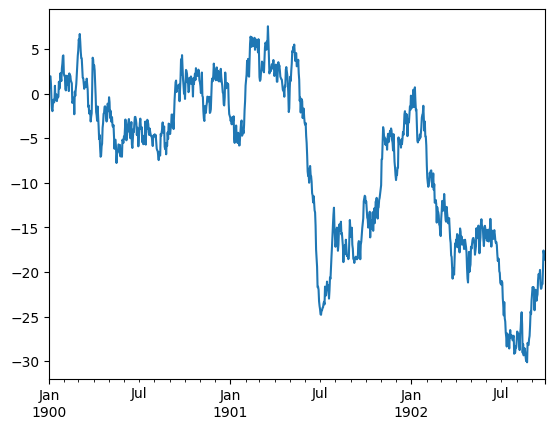

In [68]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/1900",periods=1000))
ts = ts.cumsum()
ts.plot();

<Figure size 640x480 with 0 Axes>

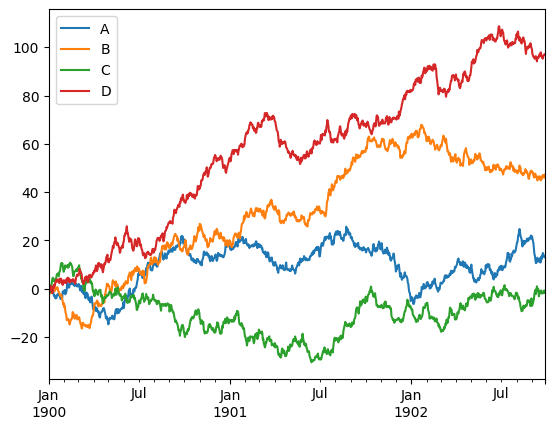

In [73]:
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=["A", "B", "C", "D"])
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

In [74]:
df.to_csv("foo.csv")
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,1900-01-01,-0.830336,0.328913,0.613217,-0.284159
1,1900-01-02,-0.350466,0.261094,1.261298,0.744297
2,1900-01-03,-1.953697,-0.839472,0.780817,1.290212
3,1900-01-04,-0.928685,-0.899432,-1.354573,0.072557
4,1900-01-05,-0.507597,-1.884316,-0.920518,1.055159
...,...,...,...,...,...
995,1902-09-23,14.829030,47.073503,-1.812605,95.328980
996,1902-09-24,14.280932,47.168114,-1.752685,96.503977
997,1902-09-25,13.500171,46.505014,-1.037911,96.667914
998,1902-09-26,13.032385,46.024825,-0.697819,97.128626


In [76]:
!pip install pytables

ERROR: Could not find a version that satisfies the requirement pytables (from versions: none)
ERROR: No matching distribution found for pytables

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [75]:
df.to_hdf("foo.h5", "df")
pd.read_hdf("foo.h5", "df")

C:\Users\hp\AppData\Local\Temp\ipykernel_64476\672561535.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df.to_hdf("foo.h5", "df")


ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

In [78]:
!pip install openpyxl

   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/250.9 kB 1.4 MB/s eta 0:00:01
   -------------- ------------------------- 92.2/250.9 kB 1.1 MB/s eta 0:00:01
   --------------------- ---------------- 143.4/250.9 kB 950.9 kB/s eta 0:00:01
   -------------------------- ----------- 174.1/250.9 kB 876.1 kB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [79]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,1900-01-01,-0.830336,0.328913,0.613217,-0.284159
1,1900-01-02,-0.350466,0.261094,1.261298,0.744297
2,1900-01-03,-1.953697,-0.839472,0.780817,1.290212
3,1900-01-04,-0.928685,-0.899432,-1.354573,0.072557
4,1900-01-05,-0.507597,-1.884316,-0.920518,1.055159
...,...,...,...,...,...
995,1902-09-23,14.829030,47.073503,-1.812605,95.328980
996,1902-09-24,14.280932,47.168114,-1.752685,96.503977
997,1902-09-25,13.500171,46.505014,-1.037911,96.667914
998,1902-09-26,13.032385,46.024825,-0.697819,97.128626


In [84]:
from string import ascii_lowercase

In [88]:
s = pd.Series(np.random.randn(5), index=[i for i in ascii_lowercase][:5])
s.head()

a   -0.014581
b    0.490133
c    0.090154
d   -0.696267
e    0.774314
dtype: float64

In [90]:
d = {"b": 1, "a": 0, "c": 2}
pd.Series(d)

b    1
a    0
c    2
dtype: int64

In [91]:
d = {"a": 0.0, "b": 1.0, "c": 2.0}
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [92]:
pd.Series(d, index=["b", "c", "d", "a"])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

In [93]:
pd.Series(5.0, index=["a", "b", "c", "d", "e"])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [94]:
s[0]

C:\Users\hp\AppData\Local\Temp\ipykernel_64476\243613605.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[0]


-0.014581357668358988

In [95]:
s[:3]

a   -0.014581
b    0.490133
c    0.090154
dtype: float64

In [96]:
s[s > s.median()]

b    0.490133
e    0.774314
dtype: float64

In [97]:
s[[4, 3, 1]]

C:\Users\hp\AppData\Local\Temp\ipykernel_64476\3696278557.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  s[[4, 3, 1]]


e    0.774314
d   -0.696267
b    0.490133
dtype: float64

In [98]:
np.exp(s)

a    0.985524
b    1.632534
c    1.094343
d    0.498442
e    2.169105
dtype: float64

In [99]:
s.array

<NumpyExtensionArray>
[-0.014581357668358988,   0.49013334354274196,   0.09015437480202357,
    -0.696267404539948,     0.774314467730087]
Length: 5, dtype: float64

In [100]:
s.to_numpy()

array([-0.01458136,  0.49013334,  0.09015437, -0.6962674 ,  0.77431447])

In [101]:
s["a"]

-0.014581357668358988

In [102]:
s["e"] = 12.0
s

a    -0.014581
b     0.490133
c     0.090154
d    -0.696267
e    12.000000
dtype: float64

In [103]:
np.exp(s)

a         0.985524
b         1.632534
c         1.094343
d         0.498442
e    162754.791419
dtype: float64

In [104]:
s[1:] + s[:-1]

a         NaN
b    0.980267
c    0.180309
d   -1.392535
e         NaN
dtype: float64

In [105]:
s = pd.Series(np.random.randn(5), name="something")
s

0   -0.157660
1   -1.460606
2    0.648882
3   -0.080634
4    0.931685
Name: something, dtype: float64

In [106]:
s2 = s.rename("different")
s2.name

'different'

In [107]:
d = {
"one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
"two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}

df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [108]:
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [109]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [110]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [111]:
df.columns

Index(['one', 'two'], dtype='object')

In [112]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [113]:
pd.DataFrame(d, index=["a", "b", "c", "d"])

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [114]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [115]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [116]:
pd.DataFrame(data, columns=["C", "A", "B"])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


In [ ]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
pd.DataFrame(data2)

In [ ]:
pd.DataFrame(data2, index=["first", "second"])

In [ ]:
pd.DataFrame(data2, columns=["a", "b"])

In [ ]:
pd.DataFrame({
    
("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
("b", "b"): {("A", "D"): 9, ("A", "B"): 10}
    
})

In [ ]:
from collections import namedtuple
Point = namedtuple("Point", "x y")
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])

In [ ]:
Point3D = namedtuple("Point3D", "x y z")

In [ ]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])

In [ ]:
from dataclasses import make_dataclass
Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

In [ ]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))

In [ ]:
pd.DataFrame.from_dict(
dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
orient="index",
columns=["one", "two", "three"],
)

In [ ]:
pd.DataFrame.from_records(data, index="C")

In [ ]:
df["three"] = df["one"] * df["two"]
df["flag"] = df["one"] > 2
df

In [ ]:
del df["two"]
three = df.pop("three")
df

In [ ]:
df["foo"] = "bar"
df

In [ ]:
df["one_trunc"] = df["one"][:2]
df

In [ ]:
df.insert(1, "bar", df["one"])
df

In [ ]:
iris = pd.read_csv("/kaggle/input/iris/Iris.csv")
iris.head()

In [ ]:
iris.assign(sepal_ratio=iris["SepalWidthCm"] / iris["SepalLengthCm"]).head()

In [ ]:
iris.assign(sepal_ratio=lambda x: (x["SepalWidthCm"] / x["SepalLengthCm"])).head()

In [ ]:
(iris.query("SepalLengthCm > 5").assign(
SepalRatio=lambda x: x.SepalWidthCm / x.SepalLengthCm,
PetalRatio=lambda x: x.PetalWidthCm / x.PetalLengthCm,
).plot(kind="scatter", x="SepalRatio", y="PetalRatio"));

In [ ]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=["A", "B", "C"])
df + df2

In [ ]:
df1 = pd.DataFrame({"a": [1, 0, 1], "b": [0, 1, 1]}, dtype=bool)
df2 = pd.DataFrame({"a": [0, 1, 1], "b": [1, 1, 0]}, dtype=bool)
df1 & df2

In [ ]:
df1 | df2

In [ ]:
df1 ^ df2

In [ ]:
-df1

In [ ]:
np.exp(df)

In [ ]:
ser = pd.Series([1, 2, 3, 4])
np.exp(ser)

In [ ]:
ser1 = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser2 = pd.Series([1, 3, 5], index=["b", "a", "c"])
ser1

In [ ]:
np.remainder(ser1, ser2)

In [ ]:
ser3 = pd.Series([2, 4, 6], index=["b", "c", "d"])
np.remainder(ser1, ser3)

In [ ]:
ser = pd.Series([1, 2, 3])
idx = pd.Index([4, 5, 6])
np.maximum(ser, idx)

In [ ]:
pd.DataFrame(np.random.randn(3, 12))

In [ ]:
pd.set_option("display.width", 40) # default is 80
pd.DataFrame(np.random.randn(3, 12))

In [ ]:
datafile = {
"filename": ["filename_01", "filename_02"],
"path": [
"media/user_name/storage/folder_01/filename_01",
"media/user_name/storage/folder_02/filename_02",]
}

pd.set_option("display.max_colwidth", 30)
pd.DataFrame(datafile)

In [ ]:
pd.set_option("display.max_colwidth", 100)
pd.DataFrame(datafile)

In [ ]:
df = pd.DataFrame({"foo1": np.random.randn(5), "foo2": np.random.randn(5)})
df

In [ ]:
index = pd.date_range("1/1/2000", periods=8)
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=["A", "B", "C"])

In [ ]:
long_series = pd.Series(np.random.randn(1000))
long_series.head()

In [ ]:
df[:2]

In [ ]:
df.columns = [x.lower() for x in df.columns]
df

In [ ]:
s.array

In [ ]:
s.index.array

In [ ]:
s.to_numpy()

In [ ]:
np.asarray(s)

In [ ]:
ser = pd.Series(pd.date_range("2000", periods=2, tz="CET"))
ser.to_numpy(dtype=object)

In [ ]:
pd.set_option("compute.use_bottleneck", False)
pd.set_option("compute.use_numexpr", False)

In [ ]:
df = pd.DataFrame({
"one": pd.Series(np.random.randn(3), index=["a", "b", "c"]),
"two": pd.Series(np.random.randn(4), index=["a", "b", "c", "d"]),
"three": pd.Series(np.random.randn(3), index=["b", "c", "d"]),
})

df

In [ ]:
row = df.iloc[1]
column = df["two"]
df.sub(row, axis="columns")

In [ ]:
df.sub(row, axis=1)

In [ ]:
df.sub(column, axis="index")

In [ ]:
df.sub(column, axis=0)

In [ ]:
dfmi = df.copy()
In [27]: dfmi.index = pd.MultiIndex.from_tuples(
[(1, "a"), (1, "b"), (1, "c"), (2, "a")], names=["first", "second"]
)

dfmi.sub(column, axis=0, level="second")

In [ ]:
pd.Series(np.arange(10))

In [ ]:
div, rem = divmod(df,3)
div

In [ ]:
idx = pd.Index(np.arange(10))
idx

In [ ]:
div, rem = divmod(idx, 3)
div

In [ ]:
df.gt(df)

In [ ]:
(df > 0).all()

In [ ]:
(df > 0).any()

In [ ]:
(df > 0).any().any()

In [ ]:
pd.DataFrame(columns=list("ABC")).empty

In [ ]:
(df + df == df * 2).all()

In [ ]:
(df + df).equals(df * 2)

In [ ]:
df1 = pd.DataFrame({"col": ["foo", 0, np.nan]})
df2 = pd.DataFrame({"col": [np.nan, 0, "foo"]}, index=[2, 1, 0])
df1.equals(df2)

In [ ]:
pd.Series(["foo", "bar", "baz"]) == "foo"

In [ ]:
pd.Index(["foo", "bar", "baz"]) == "foo"

In [ ]:
pd.Series(["foo", "bar", "baz"]) == pd.Index(["foo", "bar", "qux"])

In [ ]:
pd.Series(["foo", "bar", "baz"]) == np.array(["foo", "bar", "qux"])

In [ ]:
np.array([1, 2, 3]) == np.array([2])

In [ ]:
df1 = pd.DataFrame(
{"A": [1.0, np.nan, 3.0, 5.0, np.nan], "B": [np.nan, 2.0, 3.0, np.nan, 6.0]}
)

df2 = pd.DataFrame({
"A": [5.0, 2.0, 4.0, np.nan, 3.0, 7.0],
"B": [np.nan, np.nan, 3.0, 4.0, 6.0, 8.0],
})

df1

In [ ]:
df1.combine_first(df2)

In [ ]:
def combiner(x, y):
    return np.where(pd.isna(x), y, x)
df1.combine(df2, combiner)

In [ ]:
df.sum(0, skipna=False)

In [ ]:
df.sum(axis=1, skipna=True)

In [ ]:
ts_stand = (df - df.mean()) / df.std()
ts_stand.std()

In [ ]:
xs_stand = df.sub(df.mean(1), axis=0).div(df.std(1), axis=0)
xs_stand.std(1)

In [ ]:
np.mean(df["one"])

In [ ]:
np.mean(df["one"].to_numpy())

In [ ]:
series = pd.Series(np.random.randn(500))
series[20:500] = np.nan
series[10:20] = 5
series.nunique()

In [ ]:
series = pd.Series(np.random.randn(1000))
series[::2] = np.nan
series.describe()

In [ ]:
frame = pd.DataFrame(np.random.randn(1000, 5), columns=["a", "b", "c", "d", "e"])
frame.iloc[::2] = np.nan
frame.describe()

In [ ]:
series.describe(percentiles=[0.05, 0.25, 0.75, 0.95])

In [ ]:
s = pd.Series(["a", "a", "b", "b", "a", "a", np.nan, "c", "d", "a"])
s.describe()